In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import platform as _platform
import numpy as np, pandas as pd
import sklearn as skl
import utils
import sqlite3 as sql

pd.set_option('display.width', 5000) 
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
dData,cData = utils.readDB()

In [4]:
num = len(dData)
(dData.head(10),cData.head(10))

(                      d_id    d_country  d_c0               d_c1                d_c2  d_5  d_6  d_7
 handle                                                                                             
 handle_292447   id_1000002  country_146     1   anonymous_c1_331  anonymous_c2_23084   34    1  204
 handle_292447   id_1000002  country_146     1   anonymous_c1_331  anonymous_c2_23084   34    1  204
 handle_1272807  id_1000061  country_146     0  anonymous_c1_1350   anonymous_c2_3147   51    1  203
 handle_1272807  id_1000061  country_146     0  anonymous_c1_1350   anonymous_c2_3147   51    1  203
 handle_1644226  id_1000068  country_146     0  anonymous_c1_1166  anonymous_c2_11093   41    1  204
 handle_1644226  id_1000068  country_146     0  anonymous_c1_1166  anonymous_c2_11093   41    1  204
 handle_1634852  id_1000149  country_146     1  anonymous_c1_1260   anonymous_c2_2456   10   25  198
 handle_1189159  id_1000202  country_146     0   anonymous_c1_917  anonymous_c2_19317    5 

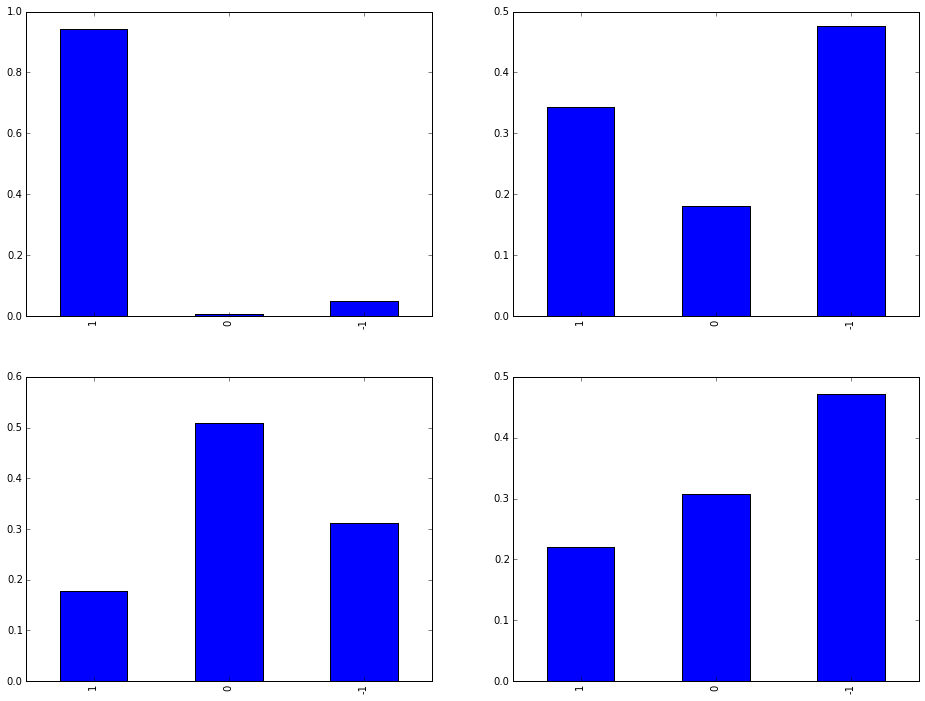

In [5]:
# plot and the percentage of ==, !- and unknown 
def check_same(x):
    if any([s=='-1' for s in [str(x[0]),str(x[1])]]):
        return -1
    else:
        return int(x[0]==x[1])
fig, axes = plt.subplots(nrows=2, ncols=2)

((pd.concat([cData['c_country'],dData['d_country']],axis=1).apply(check_same,axis=1).value_counts()/num).sort_index(ascending=False)
                                                            .plot(kind='bar',ax=axes[0,0],figsize=(16,12)) )
((pd.concat([cData['c_c0'],dData['d_c0']],axis=1).apply(check_same,axis=1).value_counts()/num).sort_index(ascending=False)
                                                            .plot(kind='bar',ax=axes[0,1],figsize=(16,12)) )
((pd.concat([cData['c_c1'],dData['d_c1']],axis=1).apply(check_same,axis=1).value_counts()/num).sort_index(ascending=False)
                                                            .plot(kind='bar',ax=axes[1,0],figsize=(16,12)) )
((pd.concat([cData['c_c2'],dData['d_c2']],axis=1).apply(check_same,axis=1).value_counts()/num).sort_index(ascending=False)
                                                            .plot(kind='bar',ax=axes[1,1],figsize=(16,12)) )

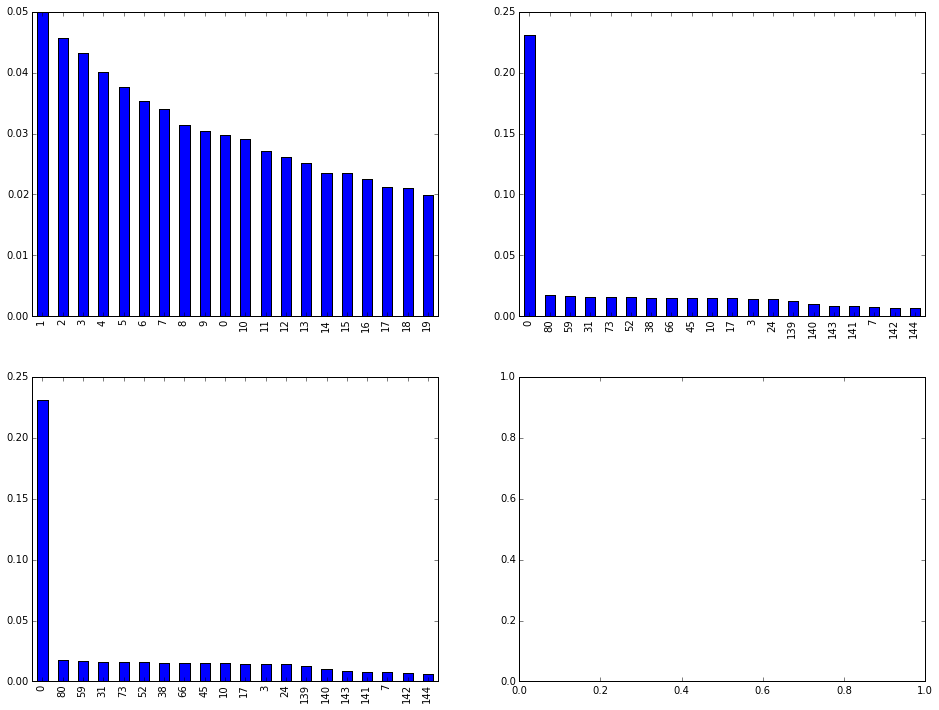

In [6]:
# plot and the percentage abs(differences)

fig, axes = plt.subplots(nrows=2, ncols=2)
(abs(cData['c_5']-dData['d_5']).value_counts()/num).iloc[:20].plot(kind='bar',ax=axes[0,0],figsize=(16,12))
(abs(cData['c_6']-dData['d_6']).value_counts()/num).iloc[:20].plot(kind='bar',ax=axes[0,1],figsize=(16,12))
(abs(cData['c_6']-dData['d_6']).value_counts()/num).iloc[:20].plot(kind='bar',ax=axes[1,0],figsize=(16,12))